# 3 Clustering Problems

In clustering we are dealing with problems of unsupervised learning. Aka problems in which we do not know what we are going to determine.

## 3.1 K-Means
We have a set of data but we do not know whether there are clusters of data. K-means doe precisely that, finds clusters from raw unorganised data.

The algorithm works as follows

1- choose a number of clusters for the dataset

2- select k points at random $\rightarrow$ centroids (not necessarly in my dataset)

3- assign each data point to the closest centroid $\rightarrow$ formation of K-clusters

4- Update the position of the centroids

5- reassign each point to the closest centroid and go to 4 $\rightarrow$ if no new assignement $\rightarrow$ END.

Questions: How do we update the position of the centroids? HOw do we decide how many clusters are there in our dataset?

The update of the centroids is done by computing the center of mass of each cluster (assigning identical mass to each point in the cluster) an placin the centroid there.

In order to decide the number of clusters that go into our classification, we need to define a metric or use in order to understand what is the correct number of clusters. We use the WCSS defined as

$$
\text{WCSS} = \sum_{j} \Big( \sum_{p_i \in C_j} d(p_i, C_j)^2 \Big)
$$

where $C_j$ is the j-th centroid and $p_i$ is the i-th point. We want to decrease WCSS, but theoretically WCSS dminishes as we increase the number of clusters and if $C = p$ $\text{WCSS}\rightarrow 0$. We want to find some form of converegence that stops the number of clusters from increasing. We can plot the values of the WCSS as a function of the number of clusters and individuate the point of convergence $\rightarrow$ elbow method.



In [7]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
import scipy.cluster.hierarchy as sch

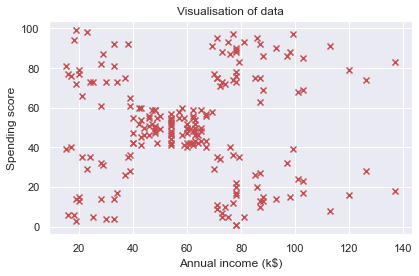

In [8]:
#===========================IMPORT AND VISUAL==============================#
dataset = pd.read_csv('Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_Customers.csv') #name of the dataset
X = dataset.iloc[:,-2:].values 
# we want to understand and identify the behaviour of the set of customers according to the features reported into the dataset. We create a dependent variable and we assign that to the elements of the dataset according to the features. We are only interested in how annula income and spending score influence the pattern... we therefore cancel other feature

plt.scatter(X[:,0], X[:,1], marker='x', c='r')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.title('Visualisation of data')
plt.tight_layout()
plt.savefig('Part 4 - Clustering/Section 24 - K-Means Clustering/Init_Data_Vis.jpg', dpi=199)


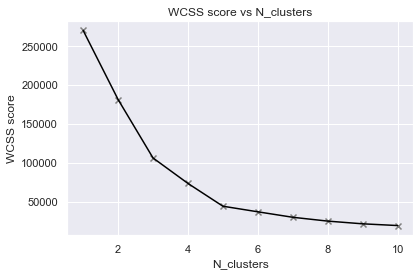

In [9]:
#===========================ELBOW METHOD==============================#
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,11):
    WCSS.append( KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X).inertia_ )

plt.plot(np.arange(1,11), WCSS, c='black')
plt.scatter(np.arange(1,11), WCSS, c='grey', marker='x')
plt.xlabel('N_clusters')
plt.ylabel('WCSS score')
plt.title('WCSS score vs N_clusters')
plt.tight_layout()
plt.savefig('Part 4 - Clustering/Section 24 - K-Means Clustering/WCSS_score.jpg', dpi=199)


In [10]:
#===========================TRAINING==============================#
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

#the fit predict method does already the creation of a dependent variable and classification of the data set according to that

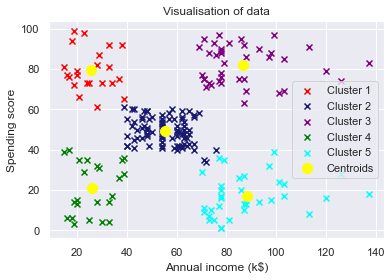

In [31]:
#===========================VISUALISATION==============================#

col = ['red', 'midnightblue', 'purple', 'green','cyan']
label =['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
for i in range(5):
    plt.scatter(
        X[y_kmeans==i,0],
        X[y_kmeans==i,1],
        marker='x',
        c= col[i],
        label = label[i]   
    )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.title('Visualisation of data')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.legend()
plt.savefig('Part 4 - Clustering/Section 24 - K-Means Clustering/Fin_Data_Vis.jpg', dpi=199)



## 3.2 Hierarchical Clustering (HC)

We concentrate on agglomerative HC.

1- look at each data point as a singleton made Clustering $\rightarrow$ N clusters

2- join together the two closest clusters $\rightarrow$ N-1 clusters

3- repeat 2 until there is only one clusters $\rightarrow$ END

by distance within clusters we can mean different concepts. Can be the euclidean distance between the two center of mass, or between the closest/farthest points, or again the average distance between points. depending from the situation one def of distance between clusters is more suitable.

Sofar the algorithm has found the way to obtain one clusters from many points we now need to understand how to get back. HC keeps memory into a dendrogram of what it has done. A dendrogram is a diagram that keeps track of every single step we have taken.

It is a tree like chart in which we place points on the x axis and distances on the y axis. At each time we make a connection we conncet the points at the height of their distance with an orizontal line.

We can now go back. We set a distance treshold after which we stop having clusters. and the algorithm disregards each cluster formed by joining elements at a bigger distance than that. As a result we have categorised the data.


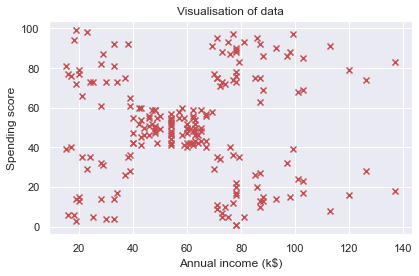

In [26]:
dataset = pd.read_csv('Part 4 - Clustering/Section 25 - Hierarchical Clustering/Mall_Customers.csv') #name of the dataset
X = dataset.iloc[:,-2:].values 
# we want to understand and identify the behaviour of the set of customers according to the features reported into the dataset. We create a dependent variable and we assign that to the elements of the dataset according to the features. We are only interested in how annula income and spending score influence the pattern... we therefore cancel other feature

plt.scatter(X[:,0], X[:,1], marker='x', c='r')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.title('Visualisation of data')
plt.tight_layout()
plt.savefig('Part 4 - Clustering/Section 25 - Hierarchical Clustering/Init_Data_Vis.jpg', dpi=199)

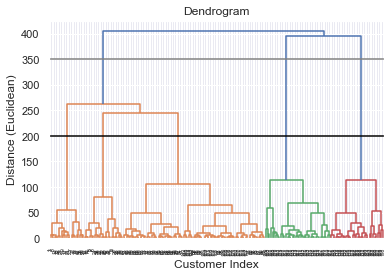

In [37]:
#============================FIND OPTIMAL NUMBER OF CLUSTERS WITH DENDEROGRAM ==========================#

dendro = sch.dendrogram(sch.linkage(X, method='ward' )) #creates the dendrogram 

plt.title('Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance (Euclidean)')
plt.plot([1,2000],[200,200], c='black')
plt.plot([1,2000],[350,350], c='grey')
plt.show()


In [27]:
#=====================5-CLUSTER==========================#
from sklearn.cluster import AgglomerativeClustering

y_hier = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit_predict(X)

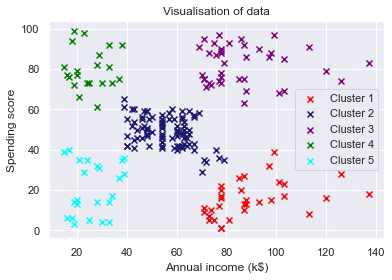

In [33]:
col = ['red', 'midnightblue', 'purple', 'green','cyan']
label =['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
for i in range(5):
    plt.scatter(
        X[y_hier==i,0],
        X[y_hier==i,1],
        marker='x',
        c= col[i],
        label = label[i]   
    )
plt.title('Visualisation of data')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.legend()
plt.savefig('Part 4 - Clustering/Section 25 - Hierarchical Clustering/Final_Data_Vis_5C.jpg', dpi=199)

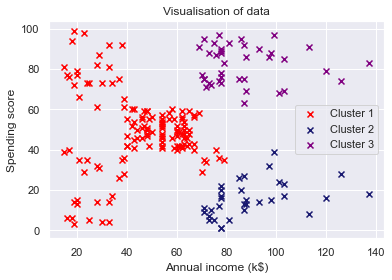

In [36]:
#=====================3-CLUSTER==========================#


y_hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X)
col = ['red', 'midnightblue', 'purple']
label =['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(3):
    plt.scatter(
        X[y_hier==i,0],
        X[y_hier==i,1],
        marker='x',
        c= col[i],
        label = label[i]   
    )
plt.title('Visualisation of data')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score')
plt.legend()
plt.savefig('Part 4 - Clustering/Section 25 - Hierarchical Clustering/Final_Data_Vis_3C.jpg', dpi=199)